In [1]:
import os
print(os.getcwd())
os.chdir('/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1')
print(os.getcwd())

/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1/src/clustering
/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1


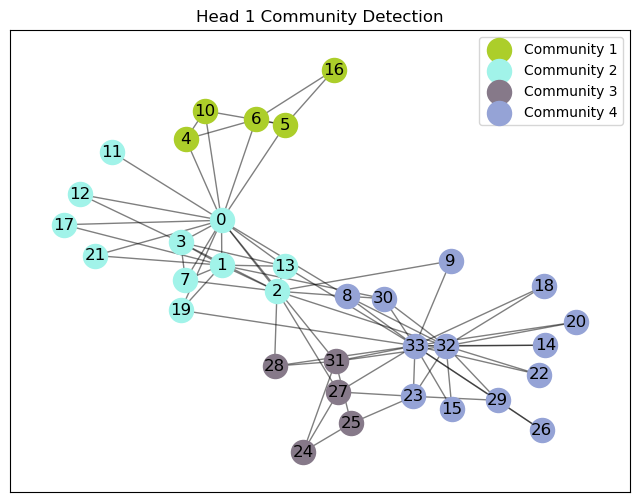

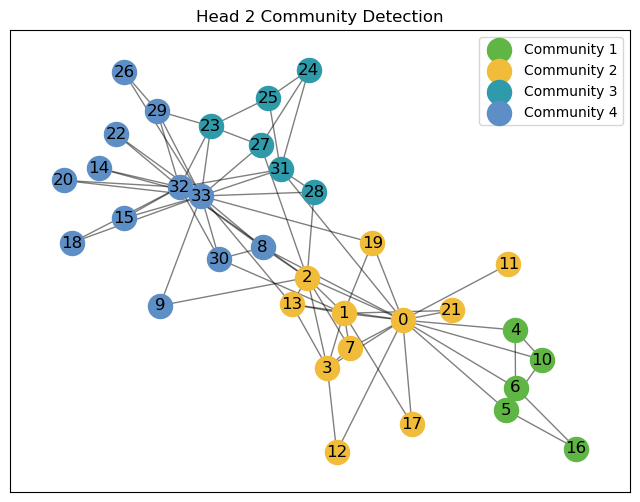

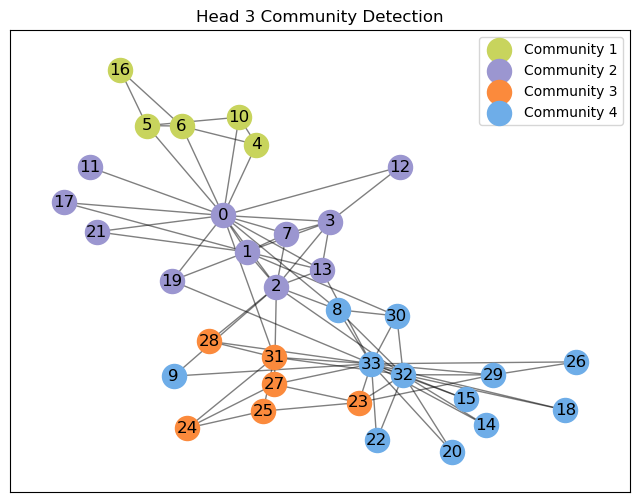

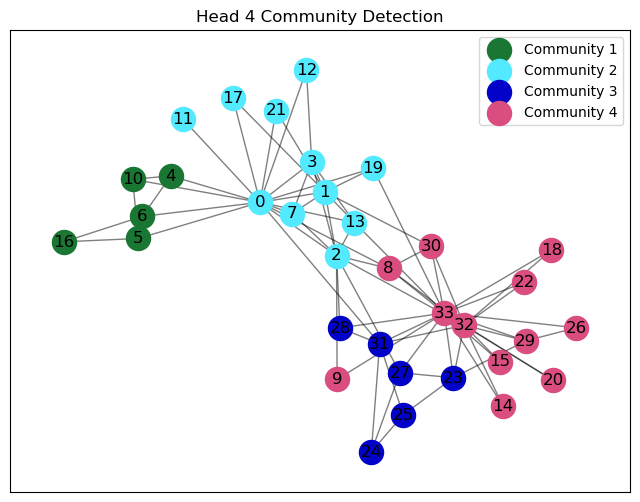

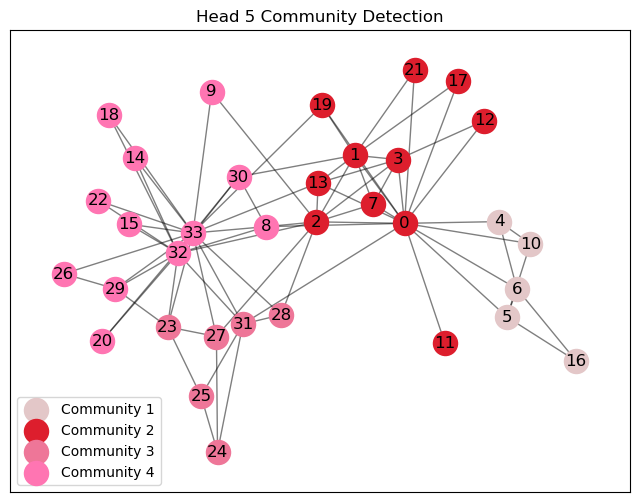

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from src.clustering.leiden import multi_head_leiden_with_mutual_info
from src.clustering.quality_functions import Modularity
# 创建一个示例图
G = nx.karate_club_graph()

# 定义质量函数
quality_function = Modularity(1)

# 设置多头机制的参数
num_heads = 5
λ = 0.1  # 互信息正则化权重
θ = 0.3  # Leiden 算法中的 θ 参数
γ = 0.05  # Leiden 算法中的 γ 参数

# 调用多头聚类函数
partitions = multi_head_leiden_with_mutual_info(G, quality_function, num_heads, λ, θ, γ)

# 绘制每个头的社区划分
for i, partition in enumerate(partitions):
    # 获取社区划分
    communities = partition.communities
    pos = nx.spring_layout(G)  # 使用 spring 布局来绘制图形

    # 给每个社区分配一个颜色
    colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in communities]

    plt.figure(figsize=(8, 6))
    plt.title(f"Head {i+1} Community Detection")

    # 为每个社区分配节点颜色
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=color, label=f"Community {list(communities).index(community)+1}")
    
    # 画出节点之间的边
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # 显示节点标签
    nx.draw_networkx_labels(G, pos)
    
    plt.legend(loc="best")
    plt.show()


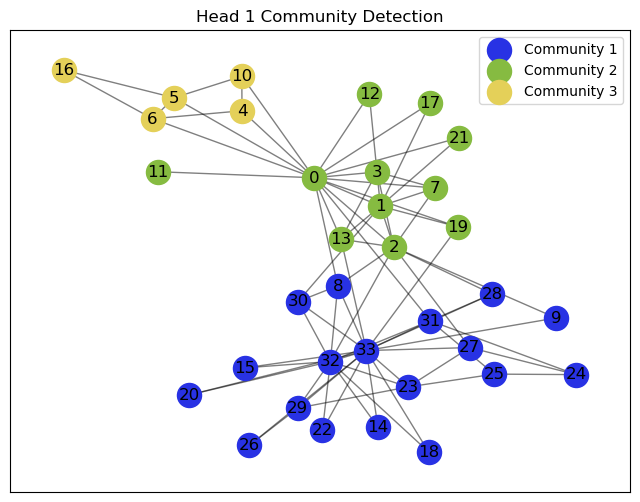

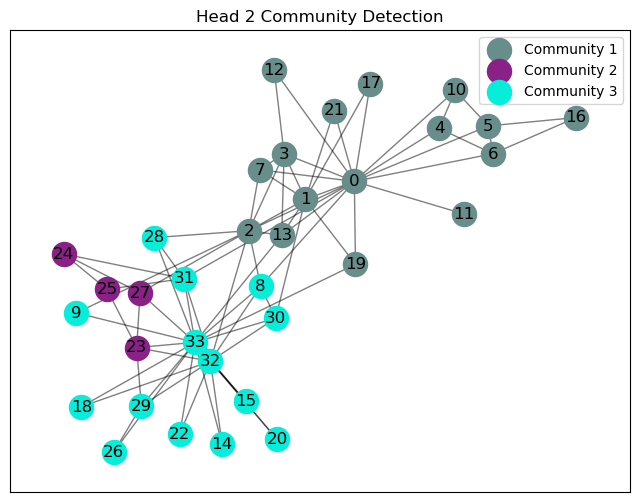

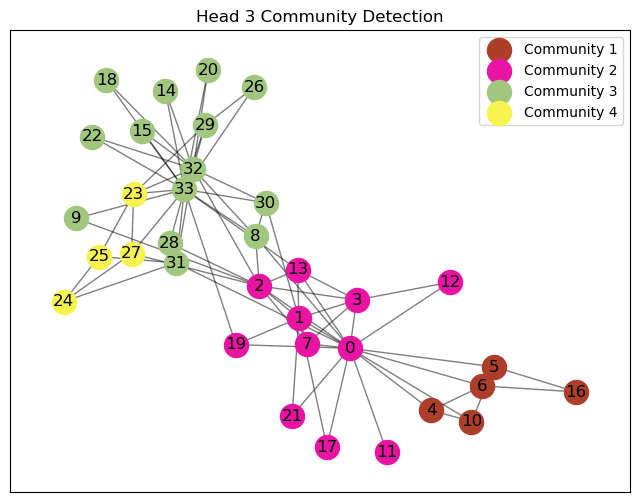

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from src.clustering.leiden_parallel import multi_head_leiden_with_mutual_info_parallel
from src.clustering.quality_functions import Modularity
# 创建一个示例图
G = nx.karate_club_graph()

# 定义质量函数
quality_function = Modularity(1)

# 设置多头机制的参数
num_heads = 3
λ = 0.1  # 互信息正则化权重
θ = 0.3  # Leiden 算法中的 θ 参数
γ = 0.05  # Leiden 算法中的 γ 参数

# 调用多头聚类函数
partitions = multi_head_leiden_with_mutual_info_parallel(G, quality_function, num_heads, λ, θ, γ)

# 绘制每个头的社区划分
for i, partition in enumerate(partitions):
    # 获取社区划分
    communities = partition.communities
    pos = nx.spring_layout(G)  # 使用 spring 布局来绘制图形

    # 给每个社区分配一个颜色
    colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in communities]

    plt.figure(figsize=(8, 6))
    plt.title(f"Head {i+1} Community Detection")

    # 为每个社区分配节点颜色
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=color, label=f"Community {list(communities).index(community)+1}")
    
    # 画出节点之间的边
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # 显示节点标签
    nx.draw_networkx_labels(G, pos)
    
    plt.legend(loc="best")
    plt.show()
